In [348]:
import Plots as plt
import Flux , Statistics ,DataFrames , OneHotArrays

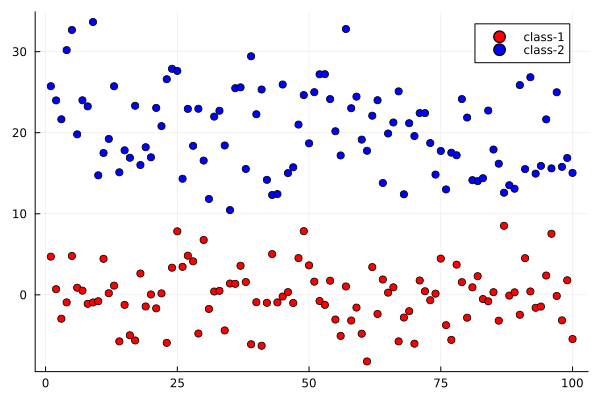

In [444]:
# Generate the Dataset
x1 = randn(100) .* 3;
x2 = 20 .+ randn(100) .* 5;
t = 1:100


plt.scatter(t,x1,color=:red,label="class-1")
plt.scatter!(t,x2,color=:blue,label="class-2")

In [445]:
X = hcat([x1 ; x2])
Y = hcat([ones(100) ; zeros(100)]) # class-1 -> 1 and class-2 -> 0
println((X|>size , Y|>size))

((200, 1), (200, 1))


In [487]:
sigmoid(a) = @. 1 / (1 + exp(-a)) # Activation Function

loss(y,ŷ) = Statistics.mean(-y .* log.(ŷ) .- (1 .- y) .* log.(1 .- ŷ)) # Loss function(logitcrossentropy)

function predict(X , theta)
    ŷ = sigmoid(X * theta)
    for i in 1:length(ŷ)
        if ŷ[i] <= 0.5
            ŷ[i] = 0
        else
            ŷ[i] = 1
        end
    end
    return ŷ
end

function LogisticRegression(x,y,epochs,lr)
    losses = zeros(epochs) # Save losses of each epoch

    θ = zeros(size(x,2)) # weights initialization
    for e in 1:epochs
        ŷ = sigmoid(x * θ)
        gradient = (transpose(X) * (ŷ .- y)) ./ length(y) # calculate gradient
        θ .-= lr * gradient # Update theta
        ŷ = (θ .* x) |> sigmoid 
        losses[e] = loss(y,ŷ) # Save loss
    end
    println("loss = $(losses[epochs])")
    return θ , losses
end

LogisticRegression (generic function with 1 method)

In [488]:
theta , losses = LogisticRegression(X,Y,100000,0.001);

loss = 0.3857987940175377


In [489]:
pred = predict(X,theta);

In [490]:
# Accuracy
Statistics.mean(pred .== Y)

0.745

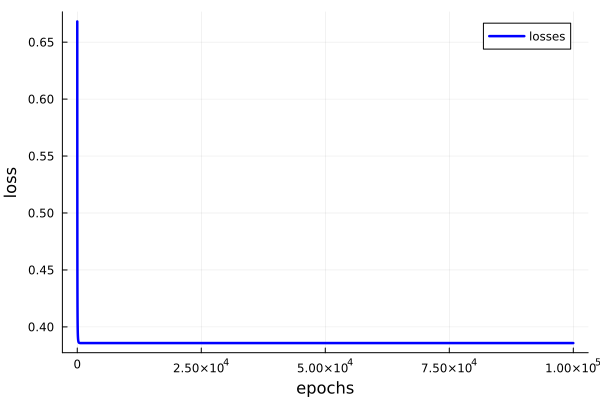

In [495]:
plt.plot(1:100000,losses,color=:blue,label="losses",
        xlabel="epochs",ylabel="loss",linewidth=2.5)


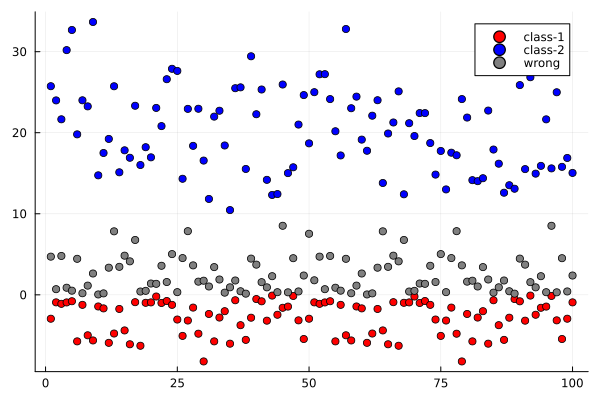

In [509]:
x1 = X[1:100][pred[1:100] .== 1]
x1_noise = X[1:100][pred[1:100] .!= 1]
x2 = X[100:end][pred[100:end] .== 0]
plt.scatter(t,x1,color=:red,label="class-1")
plt.scatter!(t,x2,color=:blue,label="class-2")
plt.scatter!(t,x1_noise,color=:gray,label="wrong")
